In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
N = 50
strategies = np.random.randint(11, size=(N, N))
strategies[strategies == 5] = 6

In [3]:
def payoff(s1, s2):
    if s1 + s2 <= 10:
        return s1
    else:
        return 0

def allpayoffs(strategies):
    payoffs = np.zeros((N, N))
    
    for row in range(N):
        for col in range(N):
            s1 = strategies[row, col]
            pay = 0
            if row != 0:
                pay += payoff(s1, strategies[row-1, col]) #Up
            if row != N-1:
                pay += payoff(s1, strategies[row+1, col]) #Down
            if col != 0:
                pay += payoff(s1, strategies[row, col-1]) #Left
            if col != N-1:
                pay += payoff(s1, strategies[row, col+1]) #Right

            payoffs[row, col] = pay
    return payoffs

In [4]:
def allNewStrats(strategies, payoffs):
    newStrats = np.zeros((N, N))
    
    for row in range(N):
        for col in range(N):
            pay = payoffs[row, col]
            strat = strategies[row, col]

            if row != 0:
                if payoffs[row-1, col] > pay:
                    strat = strategies[row-1, col]
                    pay = payoffs[row-1, col]
            if row != N-1:
                if payoffs[row+1, col] > pay:
                    strat = strategies[row+1, col]
                    pay = payoffs[row+1, col]
            if col != 0:
                if payoffs[row, col-1] > pay:
                    strat = strategies[row, col-1]
                    pay = payoffs[row, col-1]
            if col != N-1:
                if payoffs[row, col+1] > pay:
                    strat = strategies[row, col+1]
                    pay = payoffs[row, col+1]

            newStrats[row, col] = strat
            
    return newStrats

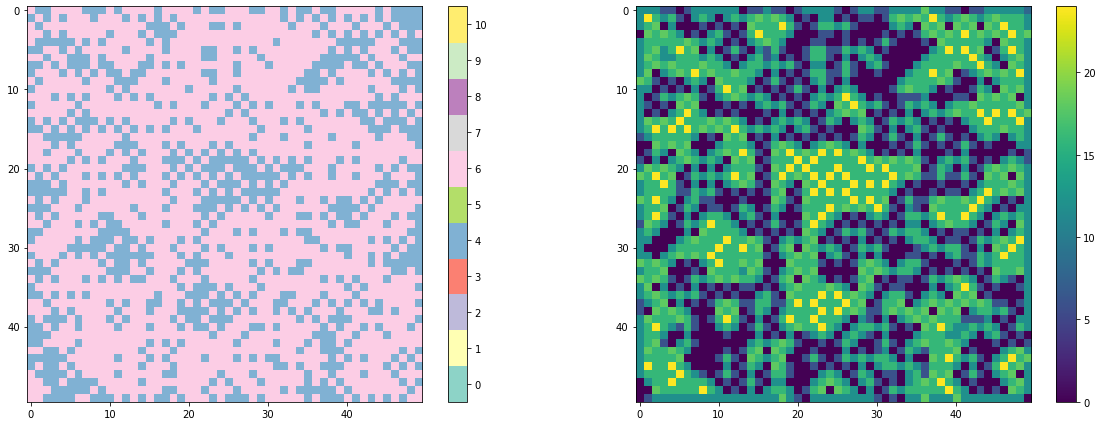

In [47]:
payoffs = allpayoffs(strategies)

cmap = plt.get_cmap("Set3", 11)

plt.figure(figsize=(20, 16))    
plt.subplot(221)
im1 = plt.imshow(strategies, cmap=cmap, vmin = -0.5, vmax = 10.5)
plt.colorbar(ticks=np.arange(0,11))

plt.subplot(222)
im2 = plt.imshow(payoffs)
plt.colorbar()
plt.show()

strategies = allNewStrats(strategies, payoffs)

In [6]:
strategies[0, 0] = 5
strategies[0, 1] = 5
strategies[1, 0] = 5
strategies[1, 1] = 5